In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
import math

In [13]:
def read_report(amt):
    path = f"standard_{amt}spill/report.txt"
    
    mat = np.zeros((3, 3))
    with open(path, 'r') as file:
        it = 0
        Uclean = 1.706101e+02
        Udirty = 1.706101e+02
        for line in file: 
            it += 1
            try:
                line = line.split()
                if it == 3:
                    mat[0,:] = [float(a) for a in line]
                if it == 4:
                    mat[1,:] = [float(a) for a in line]
                if it == 5:
                    mat[2,:] = [float(a) for a in line]

                if it == 7:
                    num = float(line[-1])
                    if not(math.isnan(num)):
                        Udirty = num

                if it == 8:
                    num = float(line[-1])
                    if not(math.isnan(num)):
                        Uclean = num
            except:
                pass
    return {'matrix': mat, 'v_c': Uclean, 'v_d': Udirty}

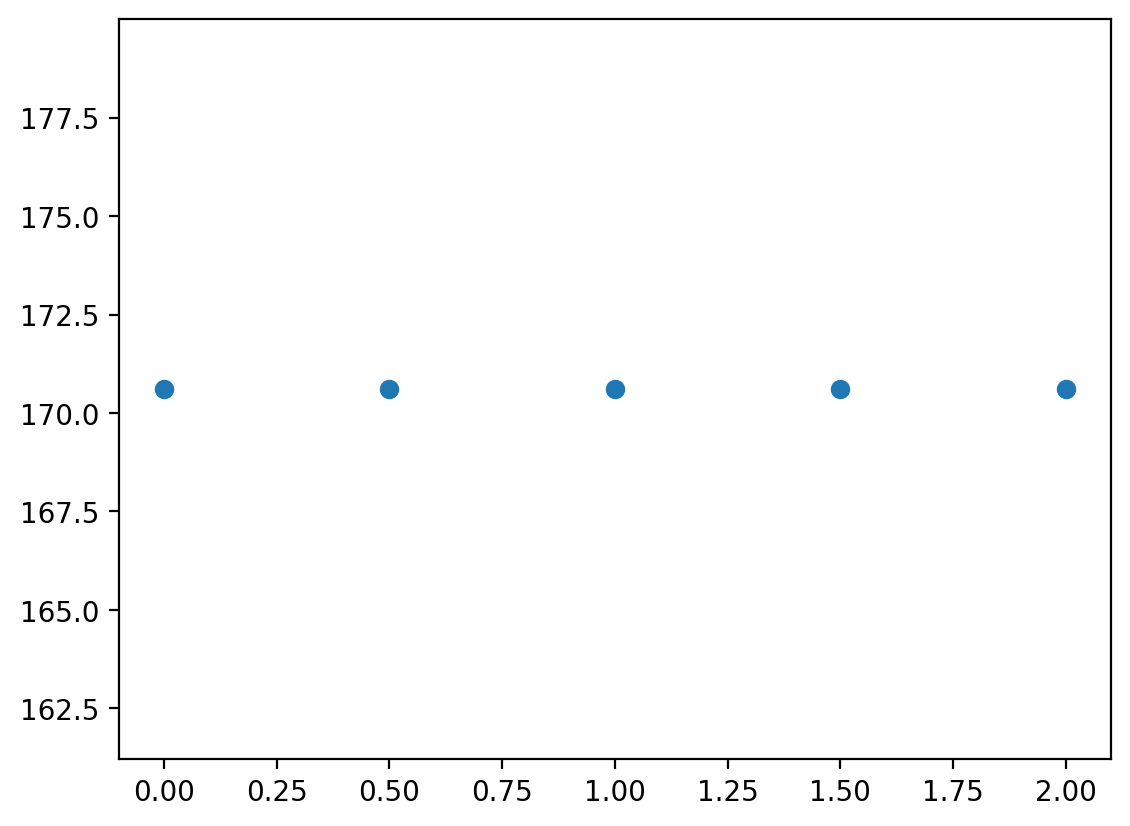

In [16]:
values = [0, 0.5, 1, 1.5, 2]
readings = np.array([read_report(num) for num in values])

plt.scatter(values, [reading['v_c'] for reading in readings])
